In [1]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as py

In [12]:
df = pd.read_csv("All Data.csv") #reading in the data generated from the data-analysis notebook
del df["Unnamed: 0"] #removing column generated from reading csv
df = df.drop(['GP', 'Team', 'W', 'L', 'division', 'GPR', "win_rate", "year"], axis = 1) #dropping undesired feature variables for model
df = df[df["msi_placed"] != -1] #data should not predict msi_placement for data that was taken at MSI
df.head()

,AGT,K,D,KD,CKPM,GSPD,GD15,FB%,FT%,F3T%,...,FBN%,BN%,LNE%,JNG%,WPM,CWPM,WCPM,EGR,MLR,msi_placed
0,42.7,239,235,1.02,0.85,0.000,0.0,0.00,0.00,0.00,...,0.00,0.40,0.000,0.000,0.00,0.00,0.00,0.0,0.0,0
1,35.8,214,269,0.80,0.96,-0.062,-1303.0,0.50,0.36,0.29,...,0.43,0.53,0.495,0.446,2.21,0.32,0.69,0.0,0.0,0
2,39.3,80,121,0.66,0.85,0.000,0.0,0.00,0.00,0.00,...,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.0,0.0,0
3,33.9,291,175,1.66,0.98,0.153,867.0,0.43,0.79,0.86,...,0.64,0.88,0.520,0.506,2.37,0.34,0.82,0.0,0.0,1
5,36.8,214,263,0.81,0.92,-0.092,-1297.0,0.36,0.43,0.36,...,0.00,0.11,0.489,0.537,2.47,0.31,0.75,0.0,0.0,0


In [13]:
"""
Process derived from:
https://www.datacamp.com/community/tutorials/decision-tree-classification-python
"""

feature_cols = list(df)[0:-1]

X = df[feature_cols]
y = df["msi_placed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

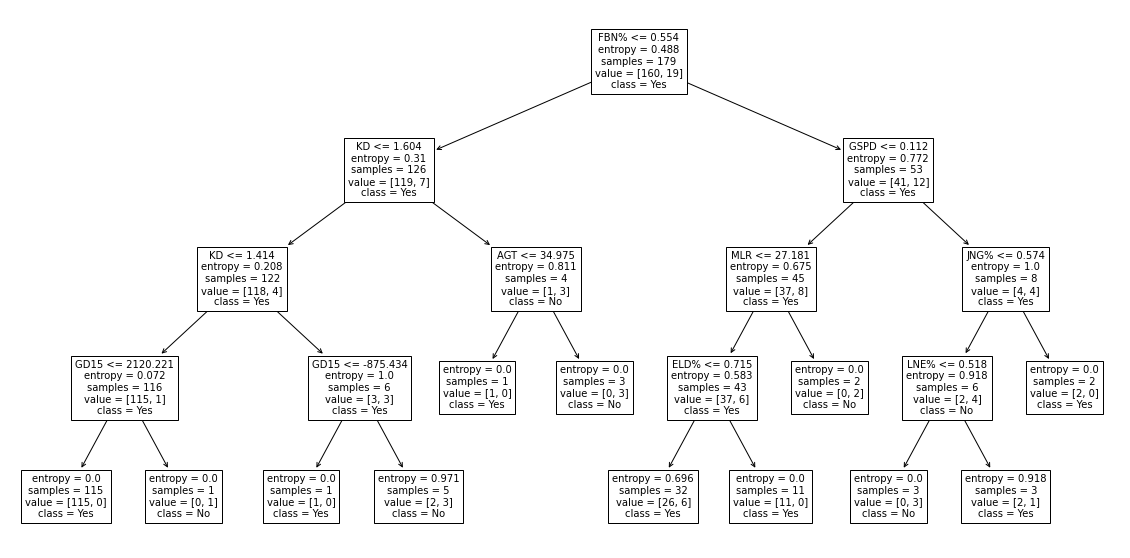

Accuracy: 0.8888888888888888
Precision: 0.5333333333333333
Recall: 0.38095238095238093


In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

dtc = DecisionTreeClassifier(criterion = "entropy", #implements the decision tree
                             splitter = "random",
                             max_depth = 4,
                             min_samples_leaf = 1)
dtc = dtc.fit(X_train, y_train) # trains the decision tree model
y_pred = dtc.predict(X_test) # results

plt.figure(figsize = (20, 10)) # visualization
tree.plot_tree(dtc, fontsize = 10, feature_names = feature_cols, class_names = ["Yes", "No"])
plt.show()
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))